### Import Necessary Libraries

In [50]:
from Main import * 

# Data Processing

### Read the telecom data

In [51]:
telco = pd.read_csv("telco.csv")
telco.head()

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No


### Set ID column as index, change churn into numeric values, encode categorical variables into dummies

In [52]:
telco.set_index('ID', inplace=True)

telco['churn'] = (telco['churn'] == "Yes").astype(int)

encode_cols = ['region', 'marital', 'ed', 'retire', 'gender', 'voice', 'internet', 'forward', 'custcat']

telco_ = pd.get_dummies(telco, columns=encode_cols, prefix=encode_cols, drop_first=True)

telco_.head()

,tenure,age,address,income,churn,region_Zone 2,region_Zone 3,marital_Unmarried,ed_Did not complete high school,ed_High school degree,ed_Post-undergraduate degree,ed_Some college,retire_Yes,gender_Male,voice_Yes,internet_Yes,forward_Yes,custcat_E-service,custcat_Plus service,custcat_Total service
ID,,,,,,,,,,,,,,,,,,,,
1,13,44,9,64,1,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False
2,11,33,7,136,1,False,True,False,False,False,True,False,False,True,True,False,True,False,False,True
3,68,52,24,116,0,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False
4,33,33,12,33,1,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False
5,23,30,9,30,0,True,False,False,True,False,False,False,False,True,False,False,True,False,True,False


# Parametric Models

### Comparison of models with usual fitters

The AIC value for WeibullFitter is 3216.8611706815464
The BIC value for WeibullFitter is 3226.676681239511


<lifelines.WeibullFitter:"Weibull_estimate", fitted with 1000 total observations, 726 right-censored observations>
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1606.43
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_ 138.09      12.38           113.82           162.36
rho_      0.95       0.05             0.85             1.05

          cmp to     z      p   -log2(p)
lambda_     1.00 11.07 <0.005      92.25
rho_        1.00 -1.07   0.29       1.80
---
AIC = 3216.86

*************************************************************************************************************************************************
The AIC value for ExponentialFitter is 3215.9608134637247
The BIC value for ExponentialFitter is 3220.868568742707


<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 1000 total observations, 726 right-censored observations>
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1606.98
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_ 129.66       7.83           114.30           145.01

          cmp to     z      p   -log2(p)
lambda_     0.00 16.55 <0.005     202.03
---
AIC = 3215.96

*************************************************************************************************************************************************
The AIC value for LogNormalFitter is 3209.0351474316735
The BIC value for LogNormalFitter is 3218.850657989638


<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 1000 total observations, 726 right-censored observations>
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1602.52
               hypothesis = mu_ != 0, sigma_ != 1

---
         coef   se(coef)   coef lower 95%   coef upper 95%
mu_      4.77       0.10             4.57             4.98
sigma_   1.81       0.09             1.64             1.97

         cmp to     z      p   -log2(p)
mu_        0.00 46.06 <0.005        inf
sigma_     1.00  9.37 <0.005      66.94
---
AIC = 3209.04

*************************************************************************************************************************************************
The AIC value for LogLogisticFitter is 3214.4154757933375
The BIC value for LogLogisticFitter is 3224.230986351302


<lifelines.LogLogisticFitter:"LogLogistic_estimate", fitted with 1000 total observations, 726 right-censored observations>
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1605.21
               hypothesis = alpha_ != 1, beta_ != 1

---
         coef   se(coef)   coef lower 95%   coef upper 95%
alpha_ 103.39       9.13            85.50           121.28
beta_    1.04       0.05             0.93             1.15

         cmp to     z      p   -log2(p)
alpha_     1.00 11.22 <0.005      94.60
beta_      1.00  0.73   0.46       1.11
---
AIC = 3214.42

*************************************************************************************************************************************************


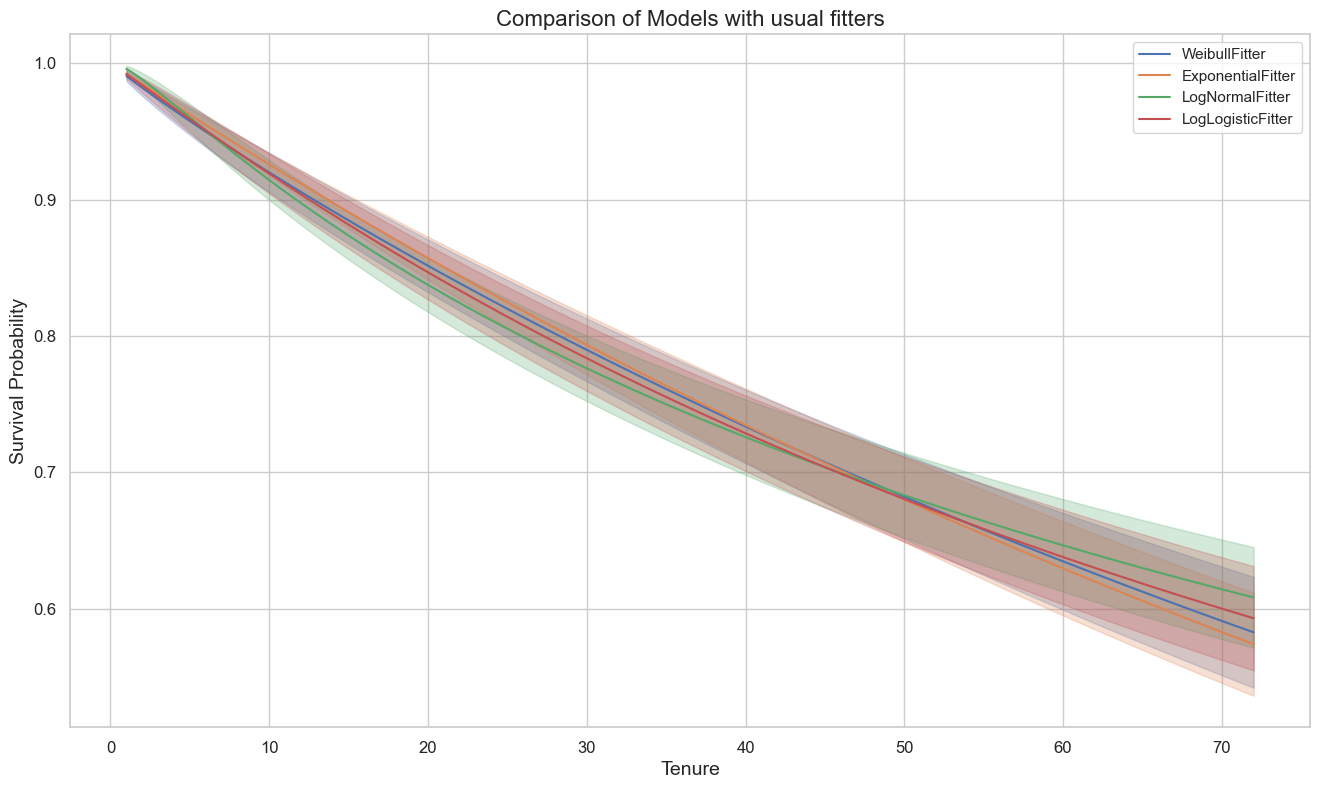

In [53]:
compare_usual_models(telco_, 'tenure', 'churn') 

### Comparison of models with ATF fitters

<lifelines.WeibullAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.17
         time fit was run = 2023-11-30 16:21:42 UTC

---
                                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                               
lambda_ address                           0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
        age                               0.03       1.03       0.01             0.01             0.04                 1.01                 1.04
        custcat_E-service                 0.98       2.66       0.16             0.67             1.28                 1.96                 3.61
        custcat_Plus service              0.74       2.10       0.19             0.36             1.12                 1.44                 3.06
        custcat_Total service             1.00       2.71       0.21             0.58             1.41                 1.78                 4.11
        ed_Did not complete high school   0.44       1.55       0.19             0.06             0.82                 1.06                 2.27
        ed_High school degree             0.32       1.38       0.15             0.03             0.61                 1.03                 1.83
        ed_Post-undergraduate degree      0.22       1.25       0.19            -0.15             0.60                 0.86                 1.82
        ed_Some college                   0.25       1.29       0.14            -0.03             0.54                 0.97                 1.71
        forward_Yes                      -0.10       0.91       0.15            -0.39             0.19                 0.68                 1.21
        gender_Male                       0.00       1.00       0.10            -0.20             0.21                 0.82                 1.23
        income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        internet_Yes                     -0.77       0.46       0.14            -1.04            -0.50                 0.35                 0.61
        marital_Unmarried                -0.35       0.71       0.10            -0.55            -0.14                 0.58                 0.87
        region_Zone 2                    -0.06       0.94       0.13            -0.31             0.19                 0.73                 1.21
        region_Zone 3                     0.12       1.12       0.13            -0.13             0.36                 0.87                 1.44
        retire_Yes                        0.17       1.19       0.52            -0.85             1.19                 0.43                 3.30
        voice_Yes                        -0.34       0.72       0.15            -0.63            -0.04                 0.53                 0.96
        Intercept                         2.78      16.14       0.27             2.25             3.31                 9.48                27.47
rho_    Intercept                         0.17       1.19       0.05             0.07             0.27                 1.08                 1.32

                                          cmp to     z      p   -log2(p)
param   covariate                                                       
lambda_ address                             0.00  4.69 <0.005      18.47
        age                                 0.00  4.12 <0.005      14.69
        custcat_E-service                   0.00  6.28 <0.005      31.44
        custcat_Plus service                0.00  3.83 <0.005      12.95
        custcat_Total service           

*************************************************************************************************************************************************


<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1457.01
         time fit was run = 2023-11-30 16:21:46 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    address                           0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.07       2.90       0.17             0.73             1.40                 2.08                 4.06
       custcat_Plus service              0.92       2.52       0.22             0.50             1.35                 1.65                 3.85
       custcat_Total service             1.20       3.32       0.25             0.71             1.69                 2.03                 5.42
       ed_Did not complete high school   0.37       1.45       0.20            -0.02             0.77                 0.98                 2.16
       ed_High school degree             0.32       1.37       0.16            -0.00             0.64                 1.00                 1.89
       ed_Post-undergraduate degree     -0.03       0.97       0.22            -0.47             0.40                 0.62                 1.50
       ed_Some college                   0.27       1.31       0.17            -0.05             0.60                 0.95                 1.82
       forward_Yes                      -0.20       0.82       0.18            -0.55             0.15                 0.58                 1.17
       gender_Male                       0.05       1.05       0.11            -0.17             0.28                 0.84                 1.32
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.77       0.46       0.14            -1.05            -0.49                 0.35                 0.61
       marital_Unmarried                -0.46       0.63       0.12            -0.68            -0.23                 0.51                 0.80
       region_Zone 2                    -0.10       0.91       0.14            -0.38             0.18                 0.69                 1.20
       region_Zone 3                     0.05       1.05       0.14            -0.23             0.33                 0.80                 1.38
       retire_Yes                        0.02       1.02       0.44            -0.85             0.89                 0.43                 2.44
       voice_Yes                        -0.43       0.65       0.17            -0.76            -0.10                 0.47                 0.90
       Intercept                         2.36      10.61       0.29             1.79             2.94                 5.98                18.84
sigma_ Intercept                         0.28       1.32       0.05             0.19             0.37                 1.20                 1.44

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
mu_    address                             0.00  4.78 <0.005      19.11
       age                                 0.00  4.50 <0.005      17.19
       custcat_E-service                   0.00  6.25 <0.005      31.21
       custcat_Plus service                0.00  4.29 <0.005      15.75
       custcat_Total service               0.00  4.79 <0.005      

*************************************************************************************************************************************************


<lifelines.LogLogisticAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1458.10
         time fit was run = 2023-11-30 16:21:49 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
alpha_ address                           0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.04       2.83       0.17             0.72             1.36                 2.05                 3.91
       custcat_Plus service              0.86       2.37       0.21             0.45             1.27                 1.57                 3.57
       custcat_Total service             1.20       3.33       0.24             0.73             1.67                 2.08                 5.34
       ed_Did not complete high school   0.43       1.54       0.20             0.04             0.82                 1.05                 2.28
       ed_High school degree             0.34       1.40       0.15             0.03             0.64                 1.03                 1.89
       ed_Post-undergraduate degree     -0.02       0.98       0.22            -0.45             0.40                 0.64                 1.49
       ed_Some college                   0.24       1.27       0.16            -0.06             0.55                 0.94                 1.73
       forward_Yes                      -0.19       0.82       0.17            -0.53             0.14                 0.59                 1.15
       gender_Male                       0.04       1.04       0.11            -0.18             0.26                 0.84                 1.29
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.80       0.45       0.14            -1.07            -0.52                 0.34                 0.60
       marital_Unmarried                -0.45       0.64       0.11            -0.66            -0.23                 0.52                 0.80
       region_Zone 2                    -0.05       0.95       0.14            -0.31             0.22                 0.73                 1.24
       region_Zone 3                     0.11       1.12       0.14            -0.15             0.38                 0.86                 1.46
       retire_Yes                        0.06       1.06       0.48            -0.87             1.00                 0.42                 2.71
       voice_Yes                        -0.40       0.67       0.16            -0.72            -0.08                 0.49                 0.92
       Intercept                         2.33      10.33       0.28             1.78             2.89                 5.95                17.93
beta_  Intercept                         0.34       1.40       0.05             0.24             0.44                 1.27                 1.55

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
alpha_ address                             0.00  4.42 <0.005      16.60
       age                                 0.00  4.67 <0.005      18.36
       custcat_E-service                   0.00  6.30 <0.005      31.62
       custcat_Plus service                0.00  4.13 <0.005      14.74
       custcat_Total service               0.00  5.00 <0.005    

*************************************************************************************************************************************************


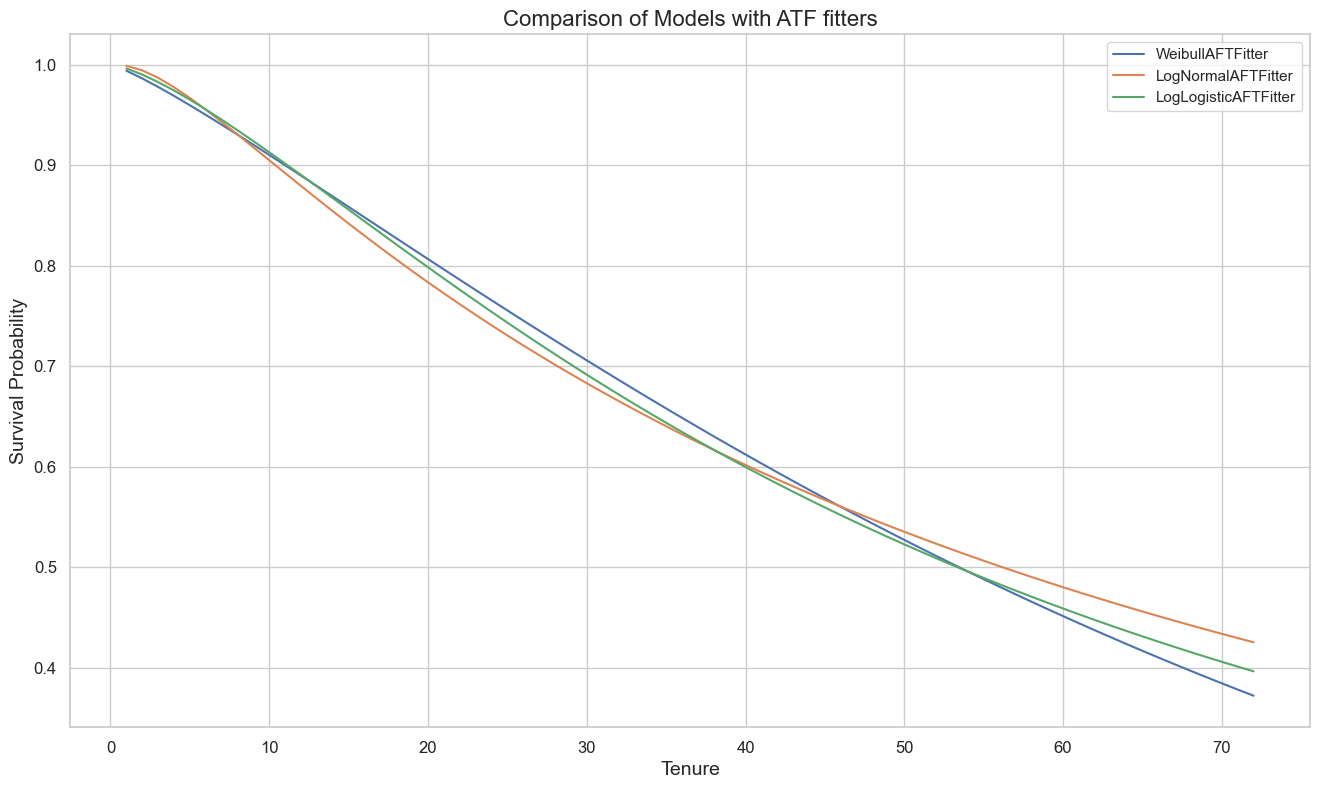

In [54]:
compare_aft_models(telco_, duration_col="tenure", event_col="churn")

1. **Model Fit:** A higher log-likelihood indicates a better fit to the data. LogNormalAFTFitter has the highest log-likelihood (-1457.01), followed closely by the LogLogisticAFTFitter (-1458.10), and then the WeibullAFTFitter (-1462.17). Thus, LogNormalAFTFitter may have the best fit to the data, although all three models perform quite similarly.

2. **Concordance Index:** The concordance index measures the predictive accuracy of the model. A higher concordance index indicates better predictive performance. All three models have similar concordance indices around 0.78-0.79. Also, in general, it seems that "custcat" (customer category), "internet_Yes," and "marital_Unmarried" are significant across all models.

3. **Coefficients:** Positive coefficients for custcat categories and internet_Yes indicate higher risk, while negative coefficients for marital_Unmarried and voice_Yes indicate lower risk.

4. **AIC:** This score balances goodness of fit and model complexity. Lower AIC values suggest better-fitting models.
    - WeibullAFTFitter: 2964.34
    - LogNormalAFTFitter: 2954.02
    - LogLogisticAFTFitter: 2956.21


- So, based on the analysis, the Log-Normal AFT model seems to be the most suitable among the three.

# Log-Normal AFT model

In [55]:
final_model = LogNormalAFTFitter()
final_model.fit(telco_, duration_col='tenure', event_col='churn')
final_model.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1457.01
         time fit was run = 2023-11-30 16:21:52 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    address                           0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.07       2.90       0.17             0.73             1.40                 2.08                 4.06
       custcat_Plus service              0.92       2.52       0.22             0.50             1.35                 1.65                 3.85
       custcat_Total service             1.20       3.32       0.25             0.71             1.69                 2.03                 5.42
       ed_Did not complete high school   0.37       1.45       0.20            -0.02             0.77                 0.98                 2.16
       ed_High school degree             0.32       1.37       0.16            -0.00             0.64                 1.00                 1.89
       ed_Post-undergraduate degree     -0.03       0.97       0.22            -0.47             0.40                 0.62                 1.50
       ed_Some college                   0.27       1.31       0.17            -0.05             0.60                 0.95                 1.82
       forward_Yes                      -0.20       0.82       0.18            -0.55             0.15                 0.58                 1.17
       gender_Male                       0.05       1.05       0.11            -0.17             0.28                 0.84                 1.32
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.77       0.46       0.14            -1.05            -0.49                 0.35                 0.61
       marital_Unmarried                -0.46       0.63       0.12            -0.68            -0.23                 0.51                 0.80
       region_Zone 2                    -0.10       0.91       0.14            -0.38             0.18                 0.69                 1.20
       region_Zone 3                     0.05       1.05       0.14            -0.23             0.33                 0.80                 1.38
       retire_Yes                        0.02       1.02       0.44            -0.85             0.89                 0.43                 2.44
       voice_Yes                        -0.43       0.65       0.17            -0.76            -0.10                 0.47                 0.90
       Intercept                         2.36      10.61       0.29             1.79             2.94                 5.98                18.84
sigma_ Intercept                         0.28       1.32       0.05             0.19             0.37                 1.20                 1.44

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
mu_    address                             0.00  4.78 <0.005      19.11
       age                                 0.00  4.50 <0.005      17.19
       custcat_E-service                   0.00  6.25 <0.005      31.21
       custcat_Plus service                0.00  4.29 <0.005      15.75
       custcat_Total service               0.00  4.79 <0.005      

#### From the summary, the significant features for the LogNormalAFTFitter model are those with p-values less than 0.05.

#### **Address, Age, Customer Category (custcat), Internet_Yes, Marital_Unmarried, Voice_Yes.**

#### Positive coefficients indicate how much the survival time of a customer increases, and negative values indicate how much it will decrease.

In [56]:
new_telco = telco_[["tenure", "churn", "address", "age", "custcat_E-service", "custcat_Plus service", "custcat_Total service", "internet_Yes", "marital_Unmarried", "voice_Yes"]]

In [57]:
logNormAFT_model = LogNormalAFTFitter()
logNormAFT_model.fit(new_telco, duration_col='tenure', event_col='churn')
logNormAFT_model.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.10
         time fit was run = 2023-11-30 16:21:55 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
mu_    address                 0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                     0.04       1.04       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service       1.03       2.79       0.17             0.69             1.36                 2.00                 3.89
       custcat_Plus service    0.82       2.28       0.17             0.49             1.15                 1.63                 3.17
       custcat_Total service   1.01       2.75       0.21             0.60             1.42                 1.83                 4.15
       internet_Yes           -0.84       0.43       0.14            -1.11            -0.57                 0.33                 0.57
       marital_Unmarried      -0.45       0.64       0.11            -0.67            -0.22                 0.51                 0.80
       voice_Yes              -0.46       0.63       0.17            -0.79            -0.14                 0.45                 0.87
       Intercept               2.53      12.62       0.24             2.06             3.01                 7.84                20.30
sigma_ Intercept               0.28       1.33       0.05             0.19             0.37                 1.21                 1.45

                               cmp to     z      p   -log2(p)
param  covariate                                             
mu_    address                   0.00  4.84 <0.005      19.56
       age                       0.00  5.75 <0.005      26.78
       custcat_E-service         0.00  6.07 <0.005      29.53
       custcat_Plus service      0.00  4.85 <0.005      19.66
       custcat_Total service     0.00  4.83 <0.005      19.52
       internet_Yes              0.00 -6.08 <0.005      29.63
       marital_Unmarried         0.00 -3.91 <0.005      13.39
       voice_Yes                 0.00 -2.78   0.01       7.52
       Intercept                 0.00 10.45 <0.005      82.47
sigma_ Intercept                 0.00  6.15 <0.005      30.27
---
Concordance = 0.78
AIC = 2944.20
log-likelihood ratio test = 280.83 on 8 df
-log2(p) of ll-ratio test = 183.73

# CLV

In [58]:
clv_pred = logNormAFT_model.predict_survival_function(new_telco)
clv_pred

ID,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
1.0,0.999688,0.999736,0.999999,0.997985,0.999870,0.999934,0.996781,0.993548,0.999994,0.999997,...,0.999828,0.999961,0.999668,1.000000,0.999781,0.996036,0.995073,0.999991,0.999923,0.999471
2.0,0.998129,0.998378,0.999988,0.990703,0.999127,0.999519,0.986180,0.975242,0.999946,0.999965,...,0.998883,0.999699,0.998022,0.999998,0.998622,0.983532,0.980236,0.999915,0.999446,0.997040
3.0,0.995250,0.995831,0.999956,0.979723,0.997635,0.998631,0.971075,0.951403,0.999818,0.999879,...,0.997036,0.999113,0.995004,0.999992,0.996407,0.966176,0.960211,0.999724,0.998443,0.992790
4.0,0.991268,0.992267,0.999893,0.966472,0.995448,0.997273,0.953528,0.925327,0.999593,0.999724,...,0.994377,0.998186,0.990846,0.999979,0.993269,0.946364,0.937776,0.999396,0.996923,0.987122
5.0,0.986400,0.987874,0.999796,0.951860,0.992655,0.995483,0.934724,0.898616,0.999264,0.999491,...,0.991029,0.996934,0.985782,0.999957,0.989366,0.925411,0.914381,0.998926,0.994934,0.980384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68.0,0.595597,0.612735,0.941530,0.380751,0.681995,0.740246,0.324647,0.244165,0.887519,0.906396,...,0.655478,0.780519,0.588828,0.975035,0.631761,0.300058,0.274774,0.864845,0.727282,0.537869
69.0,0.591329,0.608517,0.940235,0.376567,0.678061,0.736667,0.320700,0.240726,0.885403,0.904544,...,0.651418,0.777252,0.584544,0.974386,0.627607,0.296244,0.271117,0.862440,0.723614,0.533498
70.0,0.587113,0.604347,0.938937,0.372457,0.674164,0.733115,0.316829,0.237363,0.883290,0.902692,...,0.647400,0.774006,0.580311,0.973732,0.623498,0.292507,0.267537,0.860042,0.719976,0.529186
71.0,0.582946,0.600224,0.937635,0.368420,0.670304,0.729590,0.313033,0.234073,0.881180,0.900841,...,0.643423,0.770779,0.576130,0.973074,0.619433,0.288845,0.264031,0.857649,0.716367,0.524932


#### For annual retention, let's keep 12 months

In [59]:
clv_pred = clv_pred.loc[1:12, :]
clv_pred

ID,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
1.0,0.999688,0.999736,0.999999,0.997985,0.999870,0.999934,0.996781,0.993548,0.999994,0.999997,...,0.999828,0.999961,0.999668,1.000000,0.999781,0.996036,0.995073,0.999991,0.999923,0.999471
2.0,0.998129,0.998378,0.999988,0.990703,0.999127,0.999519,0.986180,0.975242,0.999946,0.999965,...,0.998883,0.999699,0.998022,0.999998,0.998622,0.983532,0.980236,0.999915,0.999446,0.997040
3.0,0.995250,0.995831,0.999956,0.979723,0.997635,0.998631,0.971075,0.951403,0.999818,0.999879,...,0.997036,0.999113,0.995004,0.999992,0.996407,0.966176,0.960211,0.999724,0.998443,0.992790
4.0,0.991268,0.992267,0.999893,0.966472,0.995448,0.997273,0.953528,0.925327,0.999593,0.999724,...,0.994377,0.998186,0.990846,0.999979,0.993269,0.946364,0.937776,0.999396,0.996923,0.987122
5.0,0.986400,0.987874,0.999796,0.951860,0.992655,0.995483,0.934724,0.898616,0.999264,0.999491,...,0.991029,0.996934,0.985782,0.999957,0.989366,0.925411,0.914381,0.998926,0.994934,0.980384
6.0,0.980833,0.982817,0.999659,0.936468,0.989349,0.993308,0.915365,0.872090,0.998828,0.999179,...,0.987108,0.995383,0.980004,0.999925,0.984837,0.904064,0.890812,0.998314,0.992532,0.972845
7.0,0.974715,0.977228,0.999483,0.920676,0.985608,0.990795,0.895877,0.846177,0.998286,0.998785,...,0.982712,0.993560,0.973669,0.999880,0.979801,0.882762,0.867512,0.997565,0.989769,0.964713
8.0,0.968166,0.971217,0.999264,0.904736,0.981502,0.987984,0.876524,0.821099,0.997643,0.998313,...,0.977926,0.991495,0.966899,0.999824,0.974355,0.861767,0.844730,0.996685,0.986693,0.956144
9.0,0.961281,0.964870,0.999004,0.888819,0.977091,0.984916,0.857473,0.796960,0.996902,0.997763,...,0.972818,0.989211,0.959795,0.999753,0.968579,0.841235,0.822606,0.995682,0.983348,0.947260
10.0,0.954136,0.958260,0.998703,0.873040,0.972424,0.981623,0.838827,0.773801,0.996068,0.997139,...,0.967448,0.986734,0.952434,0.999669,0.962537,0.821255,0.801210,0.994563,0.979769,0.938154


### CLV Calculation based on our lecture slides

In [60]:
MM = 1300
r = 0.1

for col in range(1, len(clv_pred.columns)+1):
    for row in range(1, 13):
        clv_pred[col][row] = clv_pred[col][row] / (1 + r / 12)**(row - 1)

# Calculating CLV
telco['CLV'] = MM * clv_pred.sum(axis=0)

C:\Users\Davit Davtyan\AppData\Local\Temp\ipykernel_15668\616346259.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clv_pred[col][row] = clv_pred[col][row] / (1 + r / 12)**(row - 1)


In [61]:
telco.head()

,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn,CLV
ID,,,,,,,,,,,,,,,
1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,1,14540.681168
2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,1,14575.288121
3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,0,14900.515636
4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,1,13826.104062
5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,0,14692.498692


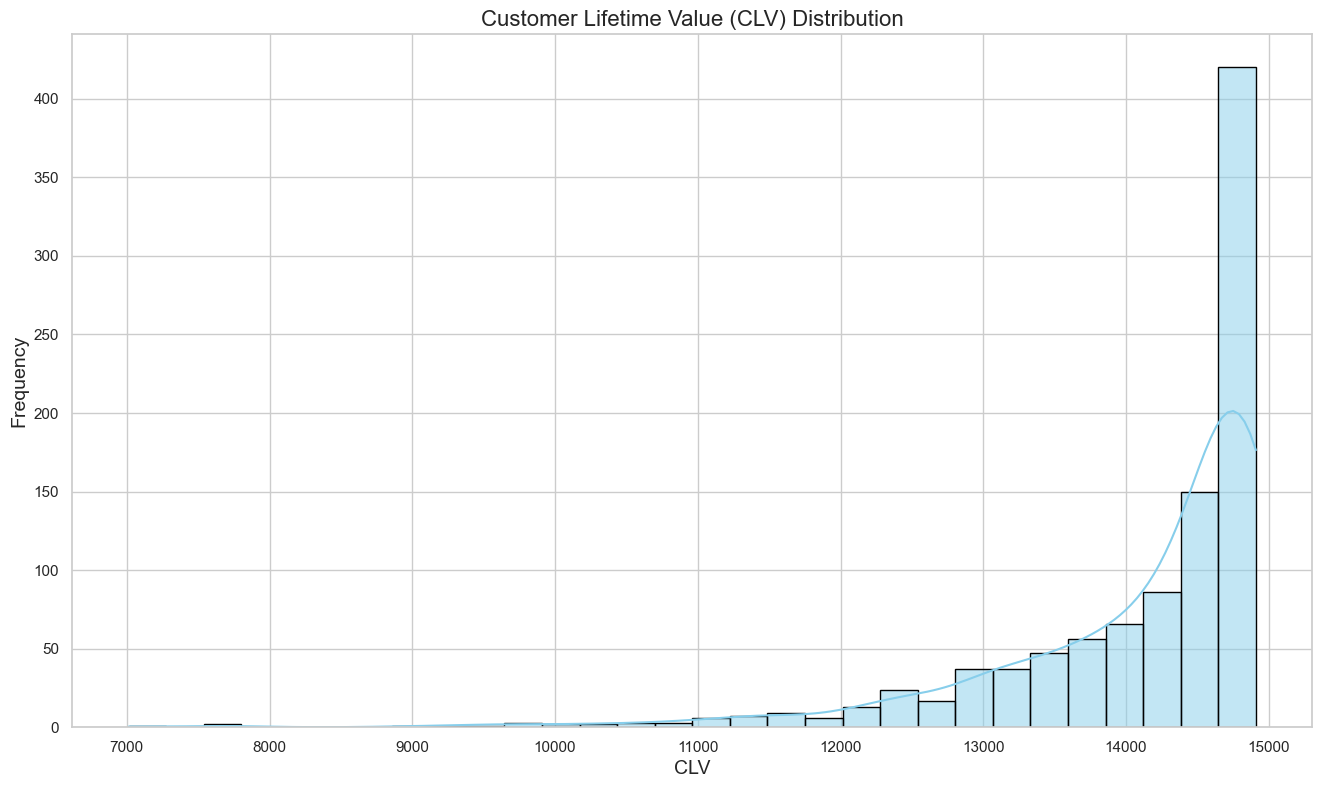

In [62]:
sns.set(style="whitegrid")

plt.figure(figsize=(16, 9))
sns.histplot(telco['CLV'], bins=30, kde=True, color='skyblue', edgecolor='black')

plt.title('Customer Lifetime Value (CLV) Distribution', fontsize=16)
plt.xlabel('CLV', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

### Customer Category

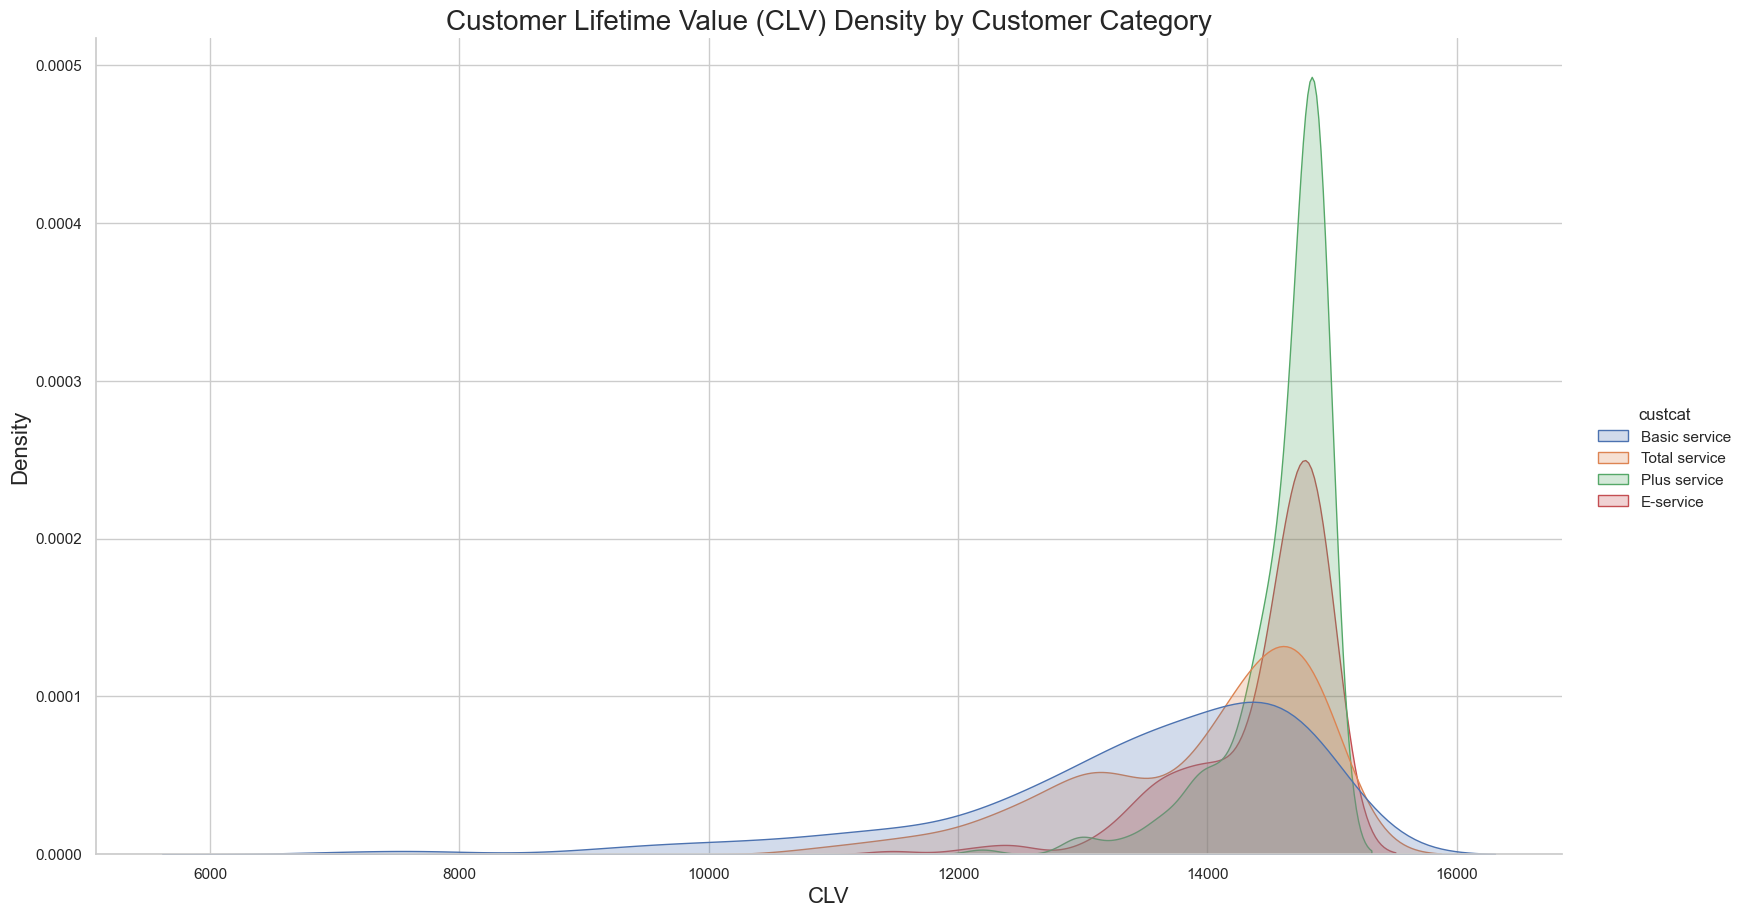

In [63]:
sns.set(style="whitegrid")

clv_custcat = sns.displot(telco, x='CLV', kind='kde', hue='custcat', fill=True, height=9, aspect=16/9)

plt.title('Customer Lifetime Value (CLV) Density by Customer Category', fontsize=20)
plt.xlabel('CLV', fontsize=16)
plt.ylabel('Density', fontsize=16)

plt.show()

### Education Degree

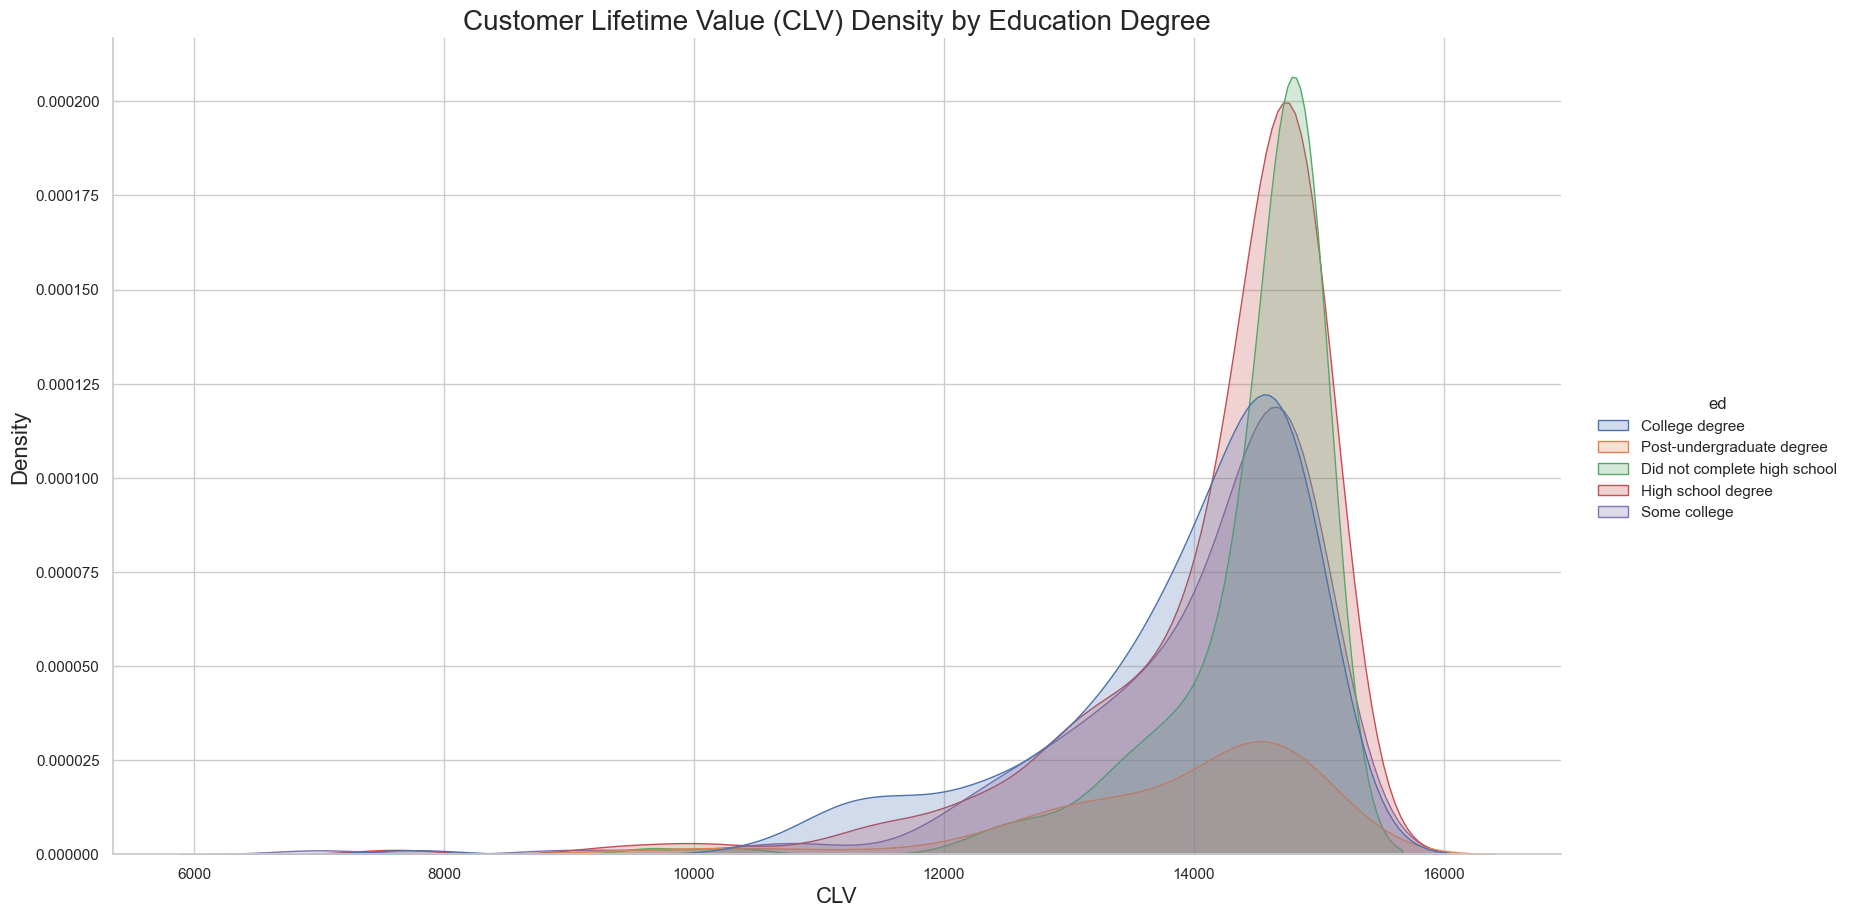

In [64]:
sns.set(style="whitegrid")

clv_edlvl = sns.displot(telco, x='CLV', kind='kde', hue='ed', fill=True, height=9, aspect=16/9)

plt.title('Customer Lifetime Value (CLV) Density by Education Degree', fontsize=20)
plt.xlabel('CLV', fontsize=16)
plt.ylabel('Density', fontsize=16)

plt.show()

### Gender

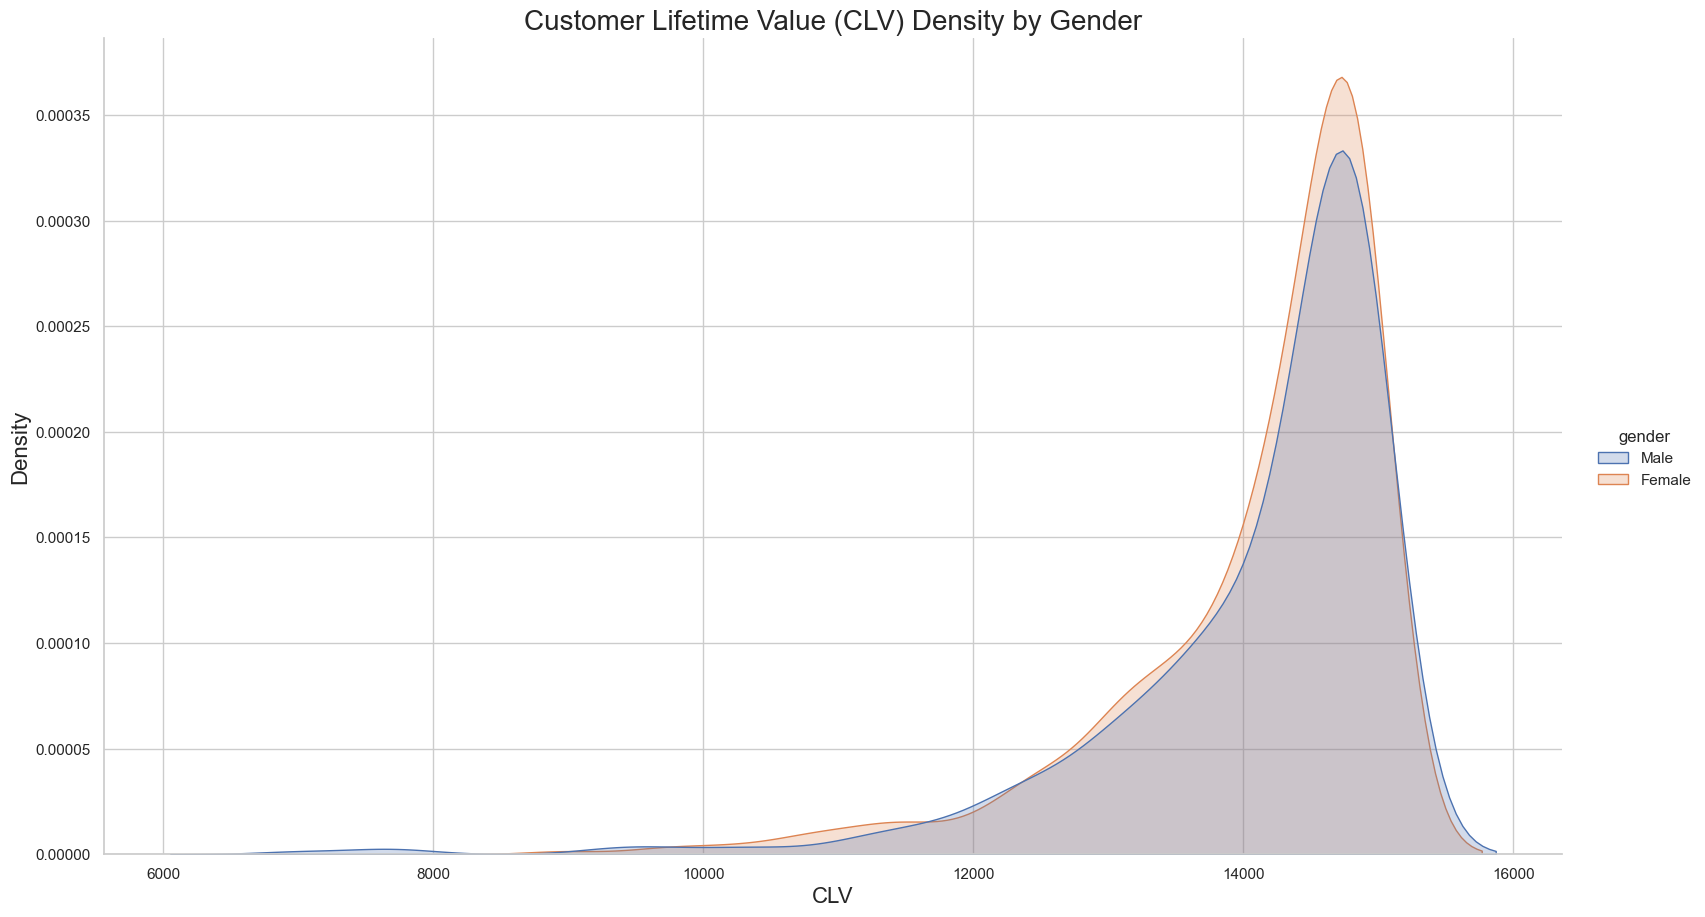

In [65]:
sns.set(style="whitegrid")

clv_gender = sns.displot(telco, x='CLV', kind='kde', hue='gender', fill=True, height=9, aspect=16/9)

plt.title('Customer Lifetime Value (CLV) Density by Gender', fontsize=20)
plt.xlabel('CLV', fontsize=16)
plt.ylabel('Density', fontsize=16)

plt.show()

### Marital Status

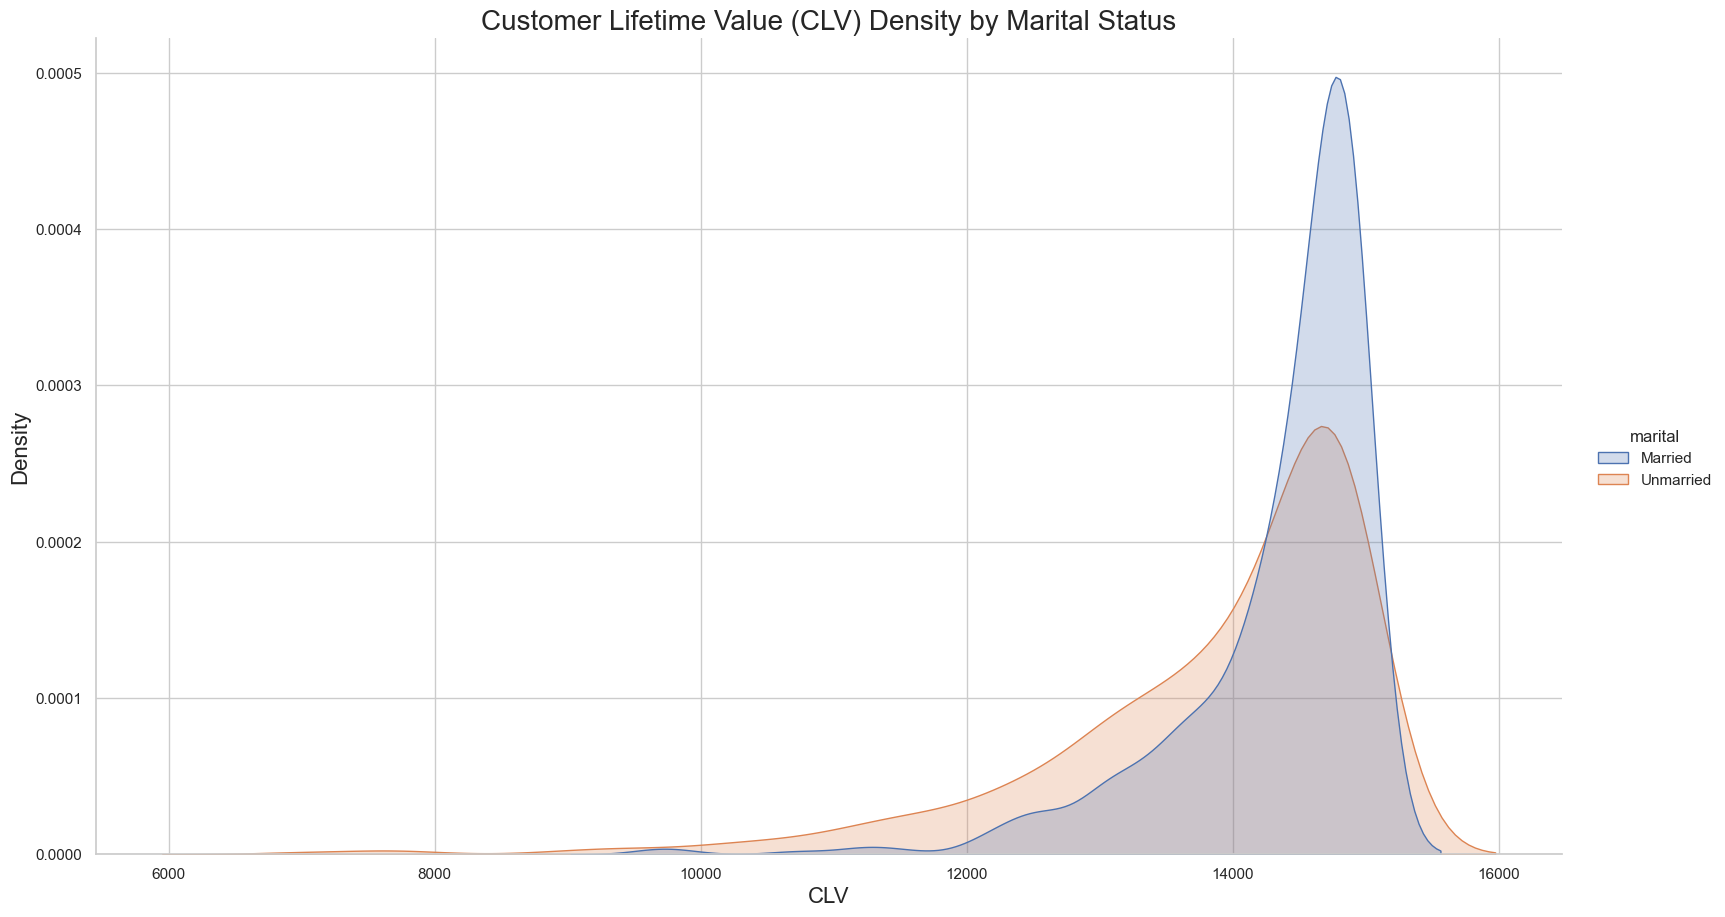

In [66]:
sns.set(style="whitegrid")

clv_marital = sns.displot(telco, x='CLV', kind='kde', hue='marital', fill=True, height=9, aspect=16/9)

plt.title('Customer Lifetime Value (CLV) Density by Marital Status', fontsize=20)
plt.xlabel('CLV', fontsize=16)
plt.ylabel('Density', fontsize=16)

plt.show()

# 1) Let's understand the factors affecting the churn risk and interpret coefficients.


In [71]:
logNormAFT_model.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1462.10
         time fit was run = 2023-11-30 16:21:55 UTC

---
                               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                     
mu_    address                 0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                     0.04       1.04       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service       1.03       2.79       0.17             0.69             1.36                 2.00                 3.89
       custcat_Plus service    0.82       2.28       0.17             0.49             1.15                 1.63                 3.17
       custcat_Total service   1.01       2.75       0.21             0.60             1.42                 1.83                 4.15
       internet_Yes           -0.84       0.43       0.14            -1.11            -0.57                 0.33                 0.57
       marital_Unmarried      -0.45       0.64       0.11            -0.67            -0.22                 0.51                 0.80
       voice_Yes              -0.46       0.63       0.17            -0.79            -0.14                 0.45                 0.87
       Intercept               2.53      12.62       0.24             2.06             3.01                 7.84                20.30
sigma_ Intercept               0.28       1.33       0.05             0.19             0.37                 1.21                 1.45

                               cmp to     z      p   -log2(p)
param  covariate                                             
mu_    address                   0.00  4.84 <0.005      19.56
       age                       0.00  5.75 <0.005      26.78
       custcat_E-service         0.00  6.07 <0.005      29.53
       custcat_Plus service      0.00  4.85 <0.005      19.66
       custcat_Total service     0.00  4.83 <0.005      19.52
       internet_Yes              0.00 -6.08 <0.005      29.63
       marital_Unmarried         0.00 -3.91 <0.005      13.39
       voice_Yes                 0.00 -2.78   0.01       7.52
       Intercept                 0.00 10.45 <0.005      82.47
sigma_ Intercept                 0.00  6.15 <0.005      30.27
---
Concordance = 0.78
AIC = 2944.20
log-likelihood ratio test = 280.83 on 8 df
-log2(p) of ll-ratio test = 183.73

1. **address, age, custcat_E-service, custcat_Plus service, custcat_Total service:**
   Positive coefficients (greater than 0). These variables are associated with an increase in the hazard (risk) of churn. For example, as the values of 'address' or 'age' increase, the churn risk tends to increase. Customers who have been with the service for a longer duration (higher 'address') or are older ('age') may develop a sense of loyalty. However, these same customers might also be more resistant to change or less interested in new offerings, making them more likely to churn. Age could also correlate with life changes, impacting the need for certain services.

   Different customer categories may have distinct needs and expectations. For example: E-service: Customers heavily reliant on electronic services might be more tech-lovely and adaptable, potentially more prone to exploring other options.Plus service: Customers seeking additional services may have higher expectations, making them more sensitive to service quality. Total service: Customers using the full spectrum of services might be more invested but could also be more demanding.

2. **internet_Yes, marital_Unmarried, voice_Yes:**
   Negative coefficients (less than 0). These variables are associated with a decrease in the hazard (risk) of churn. For example, having internet (internet_Yes) tends to reduce the churn risk. Internet_Yes: Customers with internet service may find the service more integral to their daily lives, increasing stickiness. Marital_Unmarried: Unmarried individuals might be more flexible and open to trying new services, potentially lowering churn. Voice_Yes: Having voice services could enhance communication and satisfaction, reducing the likelihood of churn.

The magnitude of the coefficient indicates the strength of the effect. 
Features with significant coefficients are more influential in predicting churn.

# 2) Let's try to find most valuable segments. Identify segments with low churn risk and high CLV. 
### High CLV with a high churn rate could be considered valuable customers from a retention point of view,  as losing them would be a problem.

In [77]:
valuable_segments = telco[(telco['churn'] == 0) & (telco['CLV'] > telco['CLV'].mean())]
print(valuable_segments.head())

    region  tenure  age    marital  address  income  \
ID                                                    
3   Zone 3      68   52    Married       24     116   
5   Zone 2      23   30    Married        9      30   
6   Zone 2      41   39  Unmarried       17      78   
9   Zone 3      45   59    Married        7     166   
10  Zone 1      68   41    Married       21      72   

                              ed retire  gender voice internet forward  \
ID                                                                       
3   Did not complete high school     No  Female    No       No      No   
5   Did not complete high school     No    Male    No       No     Yes   
6             High school degree     No  Female    No       No      No   
9                 College degree     No    Male    No       No     Yes   
10  Did not complete high school     No    Male    No       No      No   

         custcat  churn           CLV  
ID                                     
3   Plus servic

### From the retention perspective, in this way, I focus on customers who have not churned yet (churn equals 0) and are currently valuable based on their CLV being higher than the mean CLV. Analyzing this segment can help us to dive into characteristics or behaviors of customers who are valuable and have a lower likelihood of churning.

In [79]:
demographic_cols = ['age', 'income', 'ed', 'marital']
demographic_analysis = valuable_segments[demographic_cols].describe()

usage_cols = ['internet', 'voice', 'forward']
usage_analysis = valuable_segments[usage_cols].apply(pd.Series.value_counts)

customer_category_analysis = valuable_segments['custcat'].value_counts()

region_analysis = valuable_segments['region'].value_counts()

tenure_clv_relationship = valuable_segments[['tenure', 'CLV']]

print("Demographic Analysis:")
print(demographic_analysis)

print("\nUsage Behavior Analysis:")
print(usage_analysis)

print("\nCustomer Category Analysis:")
print(customer_category_analysis)

print("\nRegion Analysis:")
print(region_analysis)

print("\nTenure and CLV Relationship:")
print(tenure_clv_relationship.corr())

Demographic Analysis:
              age       income
count  540.000000   540.000000
mean    47.712963    97.009259
std     11.564012   134.894592
min     19.000000     9.000000
25%     39.000000    34.000000
50%     48.000000    57.000000
75%     56.000000   105.250000
max     77.000000  1668.000000

Usage Behavior Analysis:
     internet  voice  forward
No        429    418      242
Yes       111    122      298

Customer Category Analysis:
custcat
Plus service     218
E-service        132
Total service    101
Basic service     89
Name: count, dtype: int64

Region Analysis:
region
Zone 3    190
Zone 2    180
Zone 1    170
Name: count, dtype: int64

Tenure and CLV Relationship:
          tenure       CLV
tenure  1.000000  0.439921
CLV     0.439921  1.000000


#### Demographic Analysis: Customers in the valuable segment have a mean age of approximately 48 years, with a range from 19 to 77 years.The mean income is around 97K, with a significant standard deviation, meaning income variability. Some customers have notably high incomes. 

#### Usage Behavior Analysis: Internet and voice services are widely used among valuable customers, with a majority having these services. Forwarding service, however, is less commonly used among this segment.

#### Customer Category Analysis: The Plus service is the most common category among valuable customers, followed by E-service and Total service. Basic service has a smaller representation.

#### Region Analysis: Zone 3 has the highest count of valuable customers, followed closely by Zone 2 and then Zone 1.

#### Tenure and CLV Relationship: There is some positive correlation (0.44) between tenure and CLV. This implies that on average customers who have been with the company longer tend to have higher CLVs.

# 3) Identify at-risk subscribers

### At-risk customers (within the first 12 months who have churned)

In [ ]:
at_risk_customers = telco[(telco['tenure'] <= 12) & (telco['churn'] == 1)]

### Extract the corresponding survival probabilities for at-risk customers.

In [ ]:
survival_probabilities = clv_pred.loc[:, at_risk_customers.index]

### Calculate the adjusted CLV for at-risk customers based on survival probabilities.

In [ ]:
adjusted_clv = at_risk_customers['CLV'] * survival_probabilities.mean(axis=0)

### Estimate the annual retention budget.

In [ ]:
annual_retention_budget = adjusted_clv.sum()
round(annual_retention_budget, 2)

1147550.24

# 4) What else would you suggest doing for retention?  

#### It would be good idea to promote additional services, becasue Internet and voice services are popular, so promoting additional features or complementary services can enhance customer satisfaction and increase CLV.

#### Focus and inform customers about the benefits of forwarding services, which can lead to increase its adoption.

#### As the Plus service is the most common category, it would be beneficial to find ways to enhance this service, potentially introducing exclusive features or some fancy rewards for long-term subscribers.

#### Zone 3 has the highest count, so specific campaigns can be designed for this region.

#### Creating some loyalty programs to reward customers for their tenure and encourage long-term relationships.